In [268]:
#! /usr/bin/env python3 
# -*- coding: utf-8 -*-

"""
Course :
GTI770 — Systèmes intelligents et apprentissage machine
Project :
Lab # 2 — Arbre de décision, Bayes Naïf et KNN
Students :
Alexendre Bleau — BLEA14058906
David Létinaud  — LETD05129708
Thomas Lioret   — LIOT20069605
Group :
GTI770-A19-01
Dl pycharm sur linux
"""
from skimage import io
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier# Import Decision Tree Classifie
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
sns.set
import sklearn.metrics as metrics
#from sklearn.metric import accuracy_score, f1_score
import csv
import matplotlib.pyplot as plt

from color import center_color,crop_center
from fourier_transform import fourier_transform
from binaryPattern import binaryPatterns
#import match 
import operator
import numpy as np 
import random
import math
import pandas as pd


########################################   Initialisations   ########################################

#image_path = "C:/Users/David/Desktop/GTI770/data/data/images/"
#image_path = '/Users/thomas/Desktop/COURS_ETS/gti770/data/images/'
#dataset_path = "C:/Users/David/Desktop/GTI770/data/data/csv/galaxy/galaxy_label_data_set.csv"
#dataset_path = '/Users/thomas/Desktop/COURS_ETS/gti770/data/csv/galaxy/galaxy_label_data_set.csv'
dataset_path = "/home/alex/Desktop/GTI770-tp2/csv/galaxy/galaxy_feature_vectors.csv"
image_path = "/home/alex/Desktop/GTI770-tp2/csv/images/"
mail_data_path="/home/alex/Desktop/GTI770-tp2/csv/spam/spam.csv"
# separt la matrice de date en 2 matrice
#on doit avoir au moin 2 matrice vide créer avant l'appel de la méthode

#def SplitData(Originaldata,ratio,XTrain=[], Xtest=[]):
 #   for x in range(Originaldata):
  #      if random.random()< ratio:
   #         XTrain.append(x)
    #    else:
     #       Xtest.append(x)
# Nombre d'images total du dataset (training + testing)
nb_img = 100

# Pourcentage de données utilisées pour l'entrainement 
ratio_train = 0.7


X=[]
Y=[]


########################################   Lecture   ########################################                                                                                        
# Lecture du fichier CSV                                                                                                                                                             
with open(dataset_path, 'r') as f:
    features_list = list(csv.reader(f, delimiter=','))


    # Lecture ligne par ligne                                                                                                                                                        
    for c in range(nb_img):
        features = [float(i) for i in features_list[0][1:75]]
        galaxy_class = int(float(features_list[0][75]))
        features_list.pop(0)
        #print(type(features),type(galaxy_class))                                                                                                                                    

        X.append(features)
        Y.append(galaxy_class)


############## FIN LECTURE #########################    
########################################   Separation galaxy  ######################################## 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=ratio_train, random_state=1) # 70% training and 30% test

########################################   fin separation   ######################################## 
nb_mail=100
X_mail=[]
Y_mail=[]  
    
########################################   Lecture Spam   ######################################## 
with open(mail_data_path, 'r') as f:
    mail_features_list = list(csv.reader(f, delimiter=','))


    # Lecture ligne par ligne                                                                                                                                                        
    for c in range(nb_mail):
        mail_features = [float(i) for i in mail_features_list[0][0:57]]
        mail_class = int(float( mail_features_list[0][57]))
        mail_features_list.pop(0)
                                                                                                                                   

        X_mail.append(mail_features)
        Y_mail.append(mail_class)
        #print(X_mail)
        #print("--------------Ymail--------------")
        #print( Y_mail)
        
############## FIN LECTURE SPAM #########################            
        
########################################   Separation mail   ######################################## 
X_mail_train, X_mail_test, Y_mail_train, Y_mail_test = train_test_split(X_mail, Y_mail, train_size=ratio_train, random_state=1) # 70% training and 30% test

############## FIN separation mail#########################  

def accknn(matrice):
    deno = matrice[0][0]+matrice[1][1]
   
    
    nume = matrice[0][0]+matrice[0][1]+matrice[1][0]+matrice[1][1]
 
    acc=(float(deno)/float(nume))
    return acc*100
accknn(matrice)


    
BestK=[]
Bestacc=[]
BestF1=[]
        
def KNN(Xtrain,Xtest,Ytrain,Ytest,k):
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn.fit(Xtrain,Ytrain)
    y_pred =knn.predict(Xtest)
    confusion_matrix(Ytest,y_pred)
    matrice = confusion_matrix(Ytest,y_pred)
    
    #print(y_pred)
    #print(Ytest)
    #print(matrice)
    acc = accknn(matrice)
    vallAcc.append(acc)
    
    score_ = metrics.f1_score(Y_test, y_pred, labels=None, pos_label=1, average="weighted", sample_weight=None)*100.0

    f1score.append(score_)
    
    #if k==1:
     #   bestAcc = acc
      #  print(bestAcc)
    #elif acc > bestAcc:
        
     #   bestK=k
      #  bestAcc=acc
 def zoo_tree(X_train, X_test, Y_train, Y_test, profondeur):
    # Création d'un arbre de décision

    clf = tree.DecisionTreeClassifier(max_depth=profondeur)
    clf = clf.fit(X_train, Y_train)
    # plot_tree(clf, filled=True)
    # plt.show()

    # Prévoir la réponse pour l'ensemble de données de test
    Y_pred = clf.predict(X_test)

    acc_ = metrics.accuracy_score(Y_test, Y_pred)
    score_ = metrics.f1_score(Y_test, Y_pred, labels=None, pos_label=1, average="weighted", sample_weight=None)

    #print(acc_,score_)
    return([acc_,score_])   


[0 1 0 0 0 1 1 1 0 0 0 1 0 1 0 0 1 1 1 1 0 0 0 0 1 1 1 0 0 1]
[0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1]
[[10  8]
 [ 6  6]]
[0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 1]
[0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1]
[[13  5]
 [ 7  5]]
[0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 1 1 0 1 0 0 0 0 1 0 1 0 1 1]
[0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1]
[[11  7]
 [ 7  5]]
[0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0 1 0 1 1]
[0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1]
[[12  6]
 [ 8  4]]
[0 1 1 1 0 0 0 1 0 0 0 1 0 1 0 0 1 1 1 1 0 0 0 0 1 1 1 0 1 1]
[0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1]
[[ 8 10]
 [ 7  5]]
[0 1 1 0 0 0 0 1 0 0 0 1 0 1 0 0 1 1 1 1 0 0 0 0 1 1 0 0 1 1]
[0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,

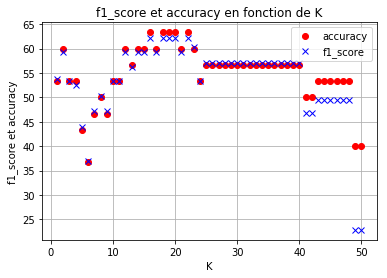

('Meilleur valeur K', 15, 'Meilleru ACC', 63.33333333333333)
('Meilleur valeur K', 47, 'Meilleur F1', 47)


In [274]:
valk=[]
vallAcc=[]
f1score=[]

#bestK=1
for x in range (1,51):
    valk.append(x)
    KNN(X_train,X_test,Y_train,Y_test,x)
#print("Meilleur valuer k:", bestK,"Meilleur Acc", bestAcc)

print("#############################----Galaxy----########################")

fig, ax2 = plt.subplots()
ax2.plot(valk,vallAcc,"or",label = "accuracy")
ax2.plot(valk,f1score,"xb",label = "f1_score")
ax2.set(xlabel='K', ylabel='f1_score et accuracy',title='f1_score et accuracy en fonction de K')
ax2.grid()
plt.legend()
plt.show()
BestAcc=0
BestF1=0
bestValk=0
for x in range(len(vallAcc)):
    if vallAcc[x] > BestAcc:
               BestAcc=vallAcc[x]
               bestValk=x
               
               
print("Meilleur valeur K",bestValk,"Meilleru ACC",BestAcc)

for x in range(len(f1score)):
    if f1score[x] > bestValk:
               bestValk=f1score[x]
               bestValk=x
                
print("Meilleur valeur K",bestValk,"Meilleur F1",bestValk)


[]
[]
[]
[0 0 0 0 1 0 0 0 1 1 0 1 0 1 1 1 1 0 1 1 0 0 0 1 0 0 0 0 1 0]
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0]
[[15  8]
 [ 3  4]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0]
[[21  2]
 [ 6  1]]
[0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0]
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0]
[[19  4]
 [ 3  4]]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0]
[[22  1]
 [ 7  0]]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0]
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0]
[[22  1]
 [ 5  2]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,

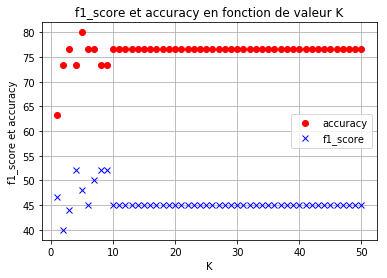

('Meilleur valeur K', 4, 'Meilleru ACC', 80.0)
('Meilleur valeur K', 45, 'Meilleur F1', 45)


In [275]:

valk=[]
#print(valk)
vallAcc=[]
#print(vallAcc)
f1score=[]
#print(f1score)

for x in range (1,51):
    valk.append(x)
    KNN(X_mail_train, X_mail_test, Y_mail_train, Y_mail_test,x)
print("#############################---mail---########################")    
fig, ax2 = plt.subplots()
ax2.plot(valk,vallAcc,"or",label = "accuracy")
ax2.plot(valk,f1score,"xb",label = "f1_score")
ax2.set(xlabel='K', ylabel='f1_score et accuracy',title='f1_score et accuracy en fonction de valeur K')
ax2.grid()
plt.legend()
plt.show()    



BestAcc=0
BestF1=0
bestValk=0
for x in range(len(vallAcc)):
    if vallAcc[x] > BestAcc:
               BestAcc=vallAcc[x]
               bestValk=x
               
               
print("Meilleur valeur K",bestValk,"Meilleru ACC",BestAcc)

for x in range(len(f1score)):
    if f1score[x] > bestValk:
               bestValk=f1score[x]
               bestValk=x
                
print("Meilleur valeur K",bestValk,"Meilleur F1",bestValk)




from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree  # Import Decision Tree Classifier


import csv
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit

depth = [None,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50]
for x in depth:
    zoo_tree(X_train, X_test, Y_train, Y_test, x)





[0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1]
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0]
